In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

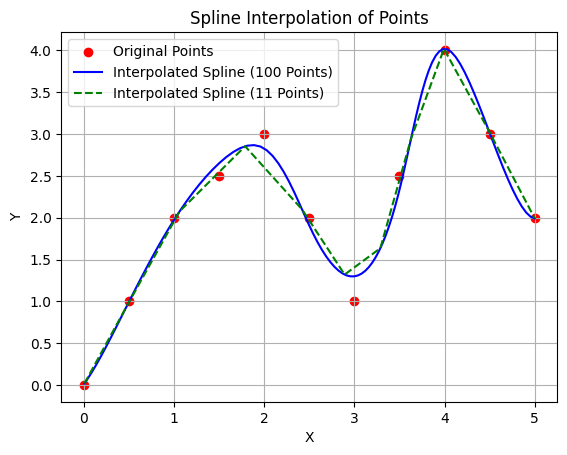

In [39]:
def interpolate_track_new(points, n_points=None, s=0):
    if len(points) <= 1:
        return points
    order_k = min(3, len(points) - 1)
    tck = interpolate.splprep([points[:, 0], points[:, 1]], k=order_k, s=s)[0]
    if n_points is None: n_points = len(points)
    track = np.array(interpolate.splev(np.linspace(0, 1, n_points), tck)).T
    return track

# Example points (randomly generated for this example)
points = np.array([
    [0, 0], 
    [0.5, 1], 
    [1, 2], 
    [1.5, 2.5], 
    [2, 3], 
    [2.5, 2], 
    [3, 1], 
    [3.5, 2.5], 
    [4, 4], 
    [4.5, 3], 
    [5, 2]
])

# Interpolate the points with a specified number of points
interpolated_points_specified = interpolate_track_new(points, n_points=100, s=0.2)

# Interpolate the points with n_points=None (defaults to original number of points)
interpolated_points_default = interpolate_track_new(points, n_points=None, s=0)

# Plot the original points
plt.scatter(points[:, 0], points[:, 1], color='red', label='Original Points')

# Plot the interpolated track with specified n_points
plt.plot(interpolated_points_specified[:, 0], interpolated_points_specified[:, 1], 
         label='Interpolated Spline (100 Points)', linestyle='-', color='blue')

# Plot the interpolated track with default n_points
plt.plot(interpolated_points_default[:, 0], interpolated_points_default[:, 1], 
         label=f'Interpolated Spline ({len(points)} Points)', linestyle='--', color='green')

# Show the plot with legend
plt.legend()
plt.title("Spline Interpolation of Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

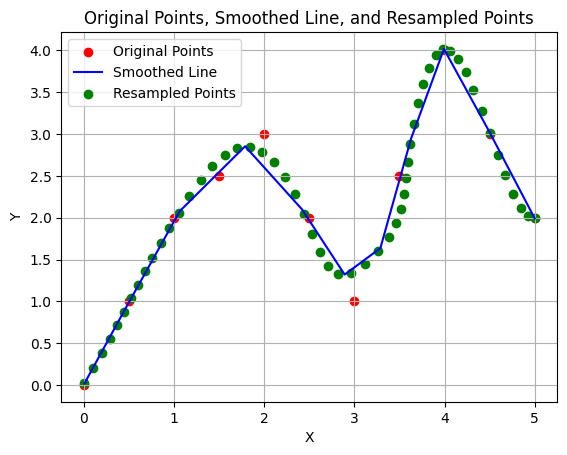

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def interpolate_track_new(points, n_points=None, s=0):
    if len(points) <= 1:
        return points
    order_k = min(3, len(points) - 1)
    tck = interpolate.splprep([points[:, 0], points[:, 1]], k=order_k, s=s)[0]
    if n_points is None: n_points = len(points)
    track = np.array(interpolate.splev(np.linspace(0, 1, n_points), tck)).T
    return track

def resample_track_points(points, seperation_distance=0.2, smoothing=0.2):
    if points[0, 0] > points[-1, 0]:
        points = np.flip(points, axis=0)

    line_length = np.sum(np.linalg.norm(np.diff(points, axis=0), axis=1))
    n_pts = max(int(line_length / seperation_distance), 2)
    smooth_line = interpolate_track_new(points, None, smoothing)
    resampled_points = interpolate_track_new(smooth_line, n_pts, 0)

    return resampled_points, smooth_line

# Example points
points = np.array([
    [0, 0], 
    [0.5, 1], 
    [1, 2], 
    [1.5, 2.5], 
    [2, 3], 
    [2.5, 2], 
    [3, 1], 
    [3.5, 2.5], 
    [4, 4], 
    [4.5, 3], 
    [5, 2]
])

# Resample the points using the function
resampled_points, smooth_line = resample_track_points(points, seperation_distance=0.2, smoothing=0.2)

# Plot the original points
plt.scatter(points[:, 0], points[:, 1], color='red', label='Original Points')

# Plot the smoothed line
plt.plot(smooth_line[:, 0], smooth_line[:, 1], color='blue', label='Smoothed Line')

# Plot the resampled points
plt.scatter(resampled_points[:, 0], resampled_points[:, 1], color='green', label='Resampled Points')

# Show the plot with legend
plt.legend()
plt.title("Original Points, Smoothed Line, and Resampled Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()
